In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset = pd.read_csv("datasets/polynomial_classification.csv")
dataset.head(3)

,x1,x2,label
0,0.160594,0.482602,1
1,1.198440,-0.542104,0
2,-0.618907,0.728517,0


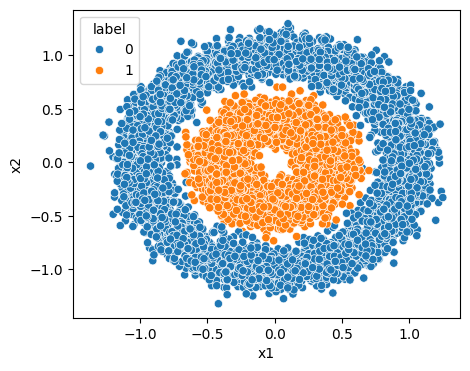

In [3]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=dataset['x1'], y=dataset['x2'], hue=dataset['label'])
plt.show()

In [4]:
x = dataset.iloc[:,:-1]
y = dataset["label"]

## Using logistic regression

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
lr.score(x_test, y_test) * 100

58.5

d:\VS Code Files\AIML\ML-Notebook\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


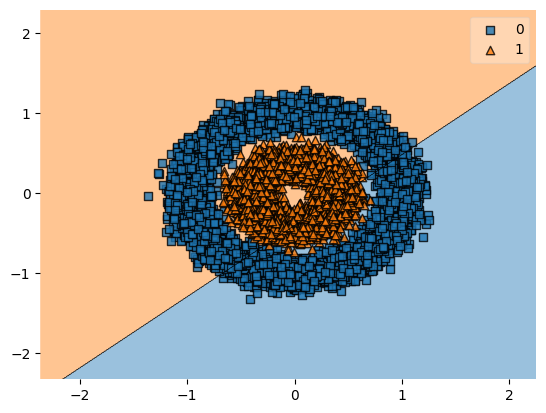

In [8]:
# plotting graph using mlxtend 
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lr)
plt.show()

In [ ]:
# accuracy for logistic regression is only about 58.5% which is very poor accuracy.

## Using polynomial features in logistic regression

In [9]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3)
pf.fit(x)
x = pd.DataFrame(pf.transform(x))

In [15]:
x.shape

(10000, 10)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
lr.score(x_test, y_test)*100

99.95

In [14]:
# when we use polynomial features, the accuracy of logistic regression increases to about 99.5% which is a significant improvement.